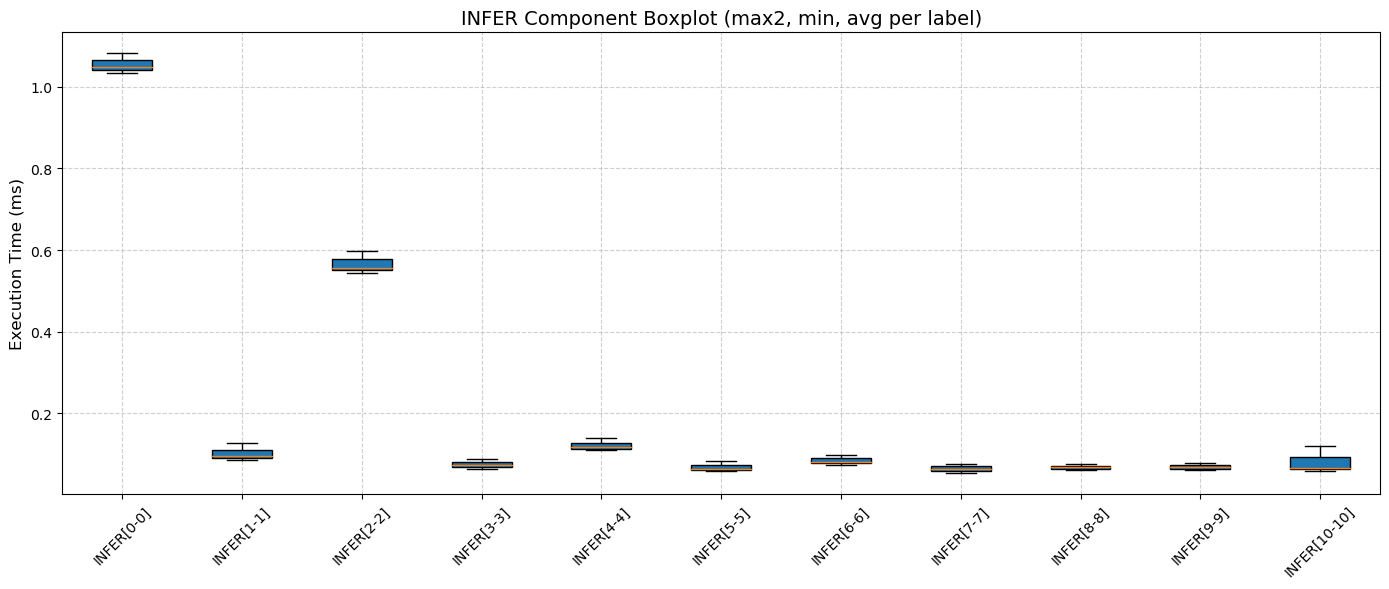

In [3]:
import os
import pandas as pd
import matplotlib.pyplot as plt

# CSV 파일 경로
csv_path = "/home/avees/tee/graph/component/src/INFER.csv"

# CSV 읽기
df = pd.read_csv(csv_path, index_col=0)

# 사용할 행 선택
selected_rows = ['max2', 'min', 'avg']
df_selected = df.loc[selected_rows]

# 각 INFER별로 박스플롯용 데이터 구성
data = []
labels = df.columns.tolist()

for col in labels:
    values = df_selected[col].values  # max2, min, avg 값 3개
    data.append(values)

# 그래프 그리기
plt.figure(figsize=(14, 6))
plt.boxplot(data, labels=labels, patch_artist=True)

plt.title("INFER Component Boxplot (max2, min, avg per label)", fontsize=14)
plt.ylabel("Execution Time (ms)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


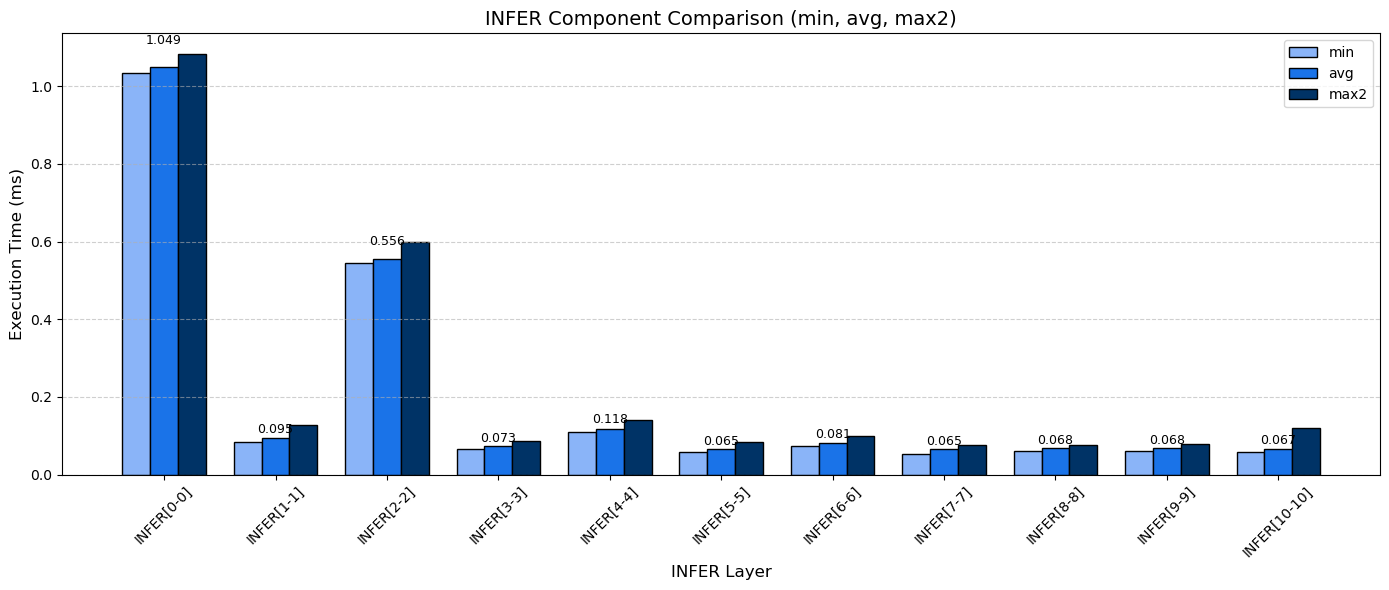

In [11]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 파일 경로
csv_path = "/home/avees/tee/graph/component/src/INFER.csv"

# CSV 읽기
df = pd.read_csv(csv_path, index_col=0)

# 사용할 행 선택 (순서: min → avg → max2)
selected_rows = ['min', 'avg', 'max2']
df_selected = df.loc[selected_rows]

# 라벨 (x축)
labels = df.columns.tolist()
x = np.arange(len(labels))  # x 위치

# 막대 폭
width = 0.25

plt.figure(figsize=(14, 6))

# 동일한 hue에 채도만 다른 색상
colors = ['#8ab4f8', '#1a73e8', '#003366']  # 밝은 파랑 → 중간 → 진한 네이비

# 막대 그래프
bars_min = plt.bar(x - width, df_selected.loc['min'], width,
                   label='min', color=colors[0], edgecolor='black')
bars_avg = plt.bar(x, df_selected.loc['avg'], width,
                   label='avg', color=colors[1], edgecolor='black')
bars_max2 = plt.bar(x + width, df_selected.loc['max2'], width,
                    label='max2', color=colors[2], edgecolor='black')

# avg 막대 위에 값 표시
for i, v in enumerate(df_selected.loc['avg']):
    plt.text(x[i], v + (v * 0.05), f"{v:.3f}", ha='center', va='bottom', fontsize=9)

# 시각적 설정
plt.title("INFER Component Comparison (min, avg, max2)", fontsize=14)
plt.ylabel("Execution Time (ms)", fontsize=12)
plt.xlabel("INFER Layer", fontsize=12)
plt.xticks(x, labels, rotation=45)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


📊 Processing: IN.csv


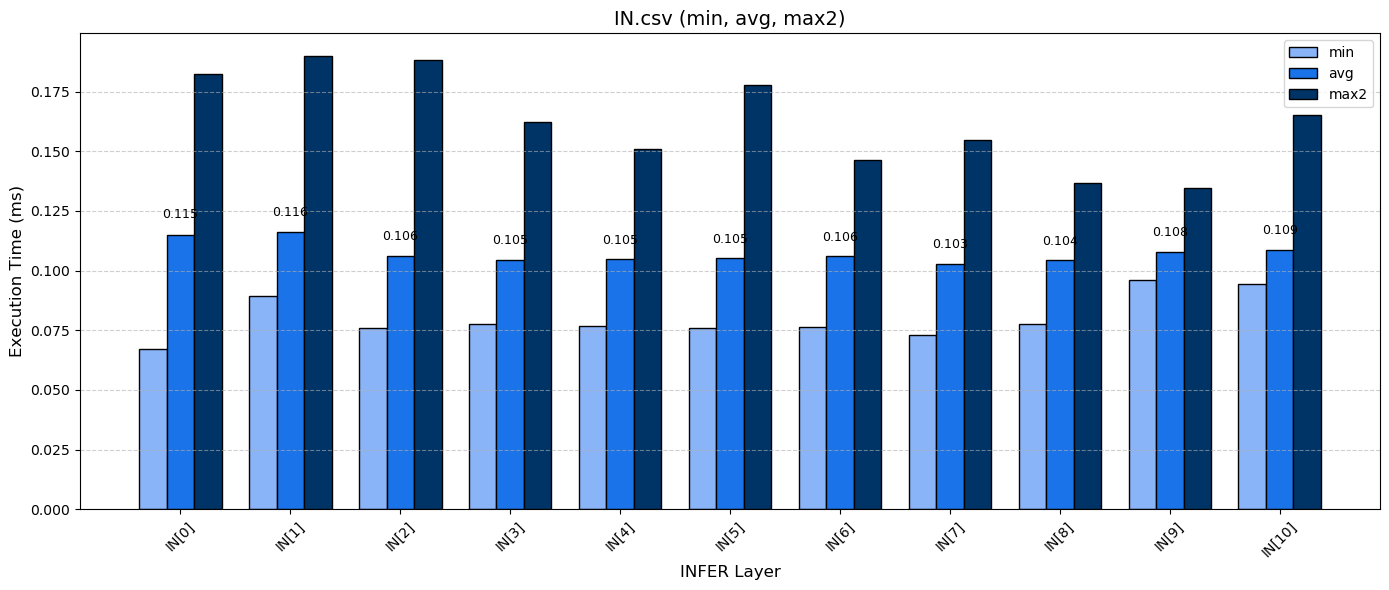

✅ Saved: /home/avees/tee/graph/component/src/IN.png
📊 Processing: INFER.csv


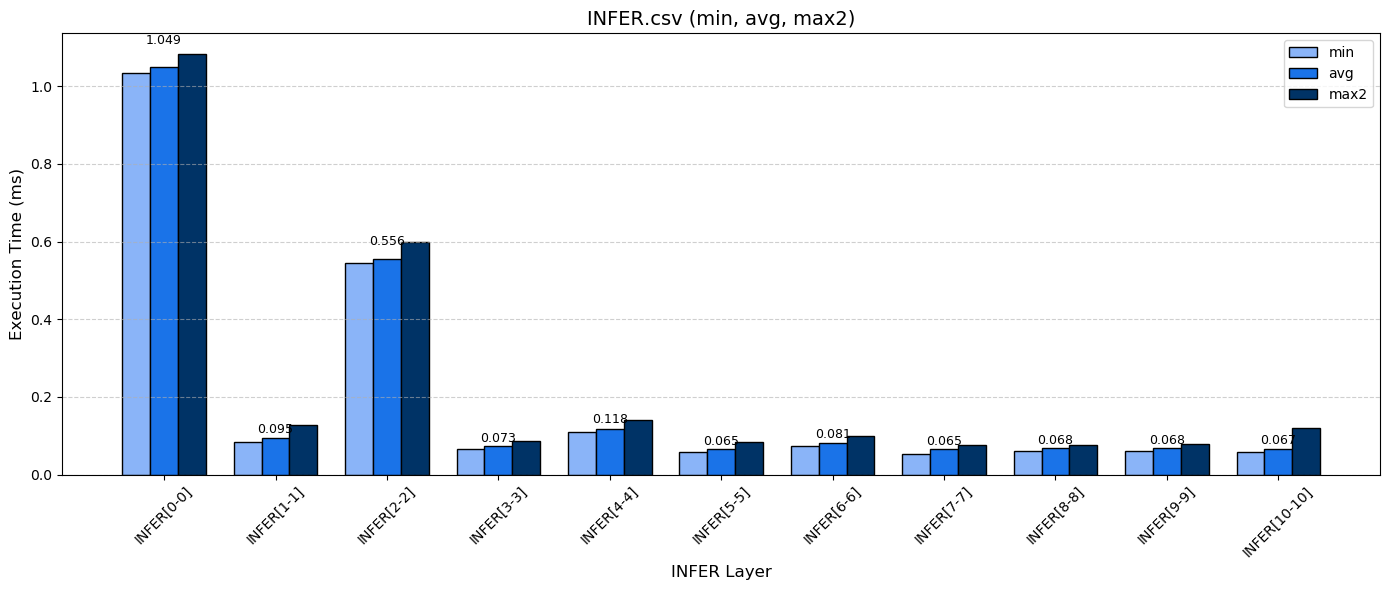

✅ Saved: /home/avees/tee/graph/component/src/INFER.png
📊 Processing: LAYER.csv


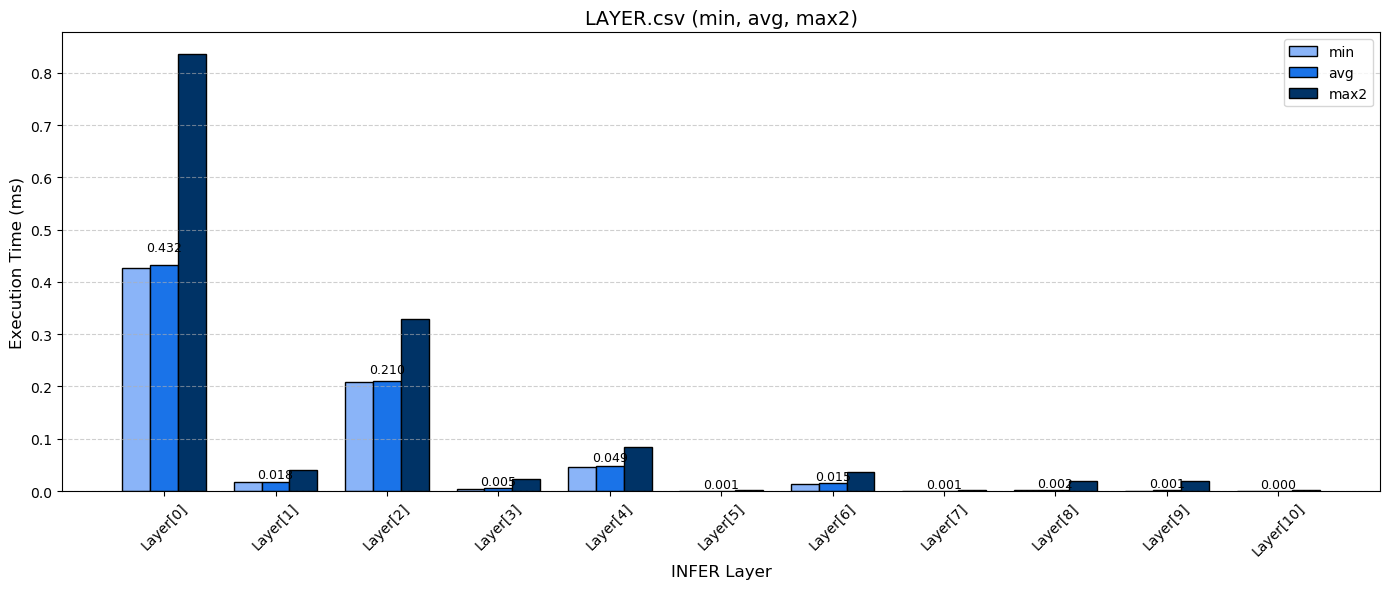

✅ Saved: /home/avees/tee/graph/component/src/LAYER.png
📊 Processing: OUT.csv


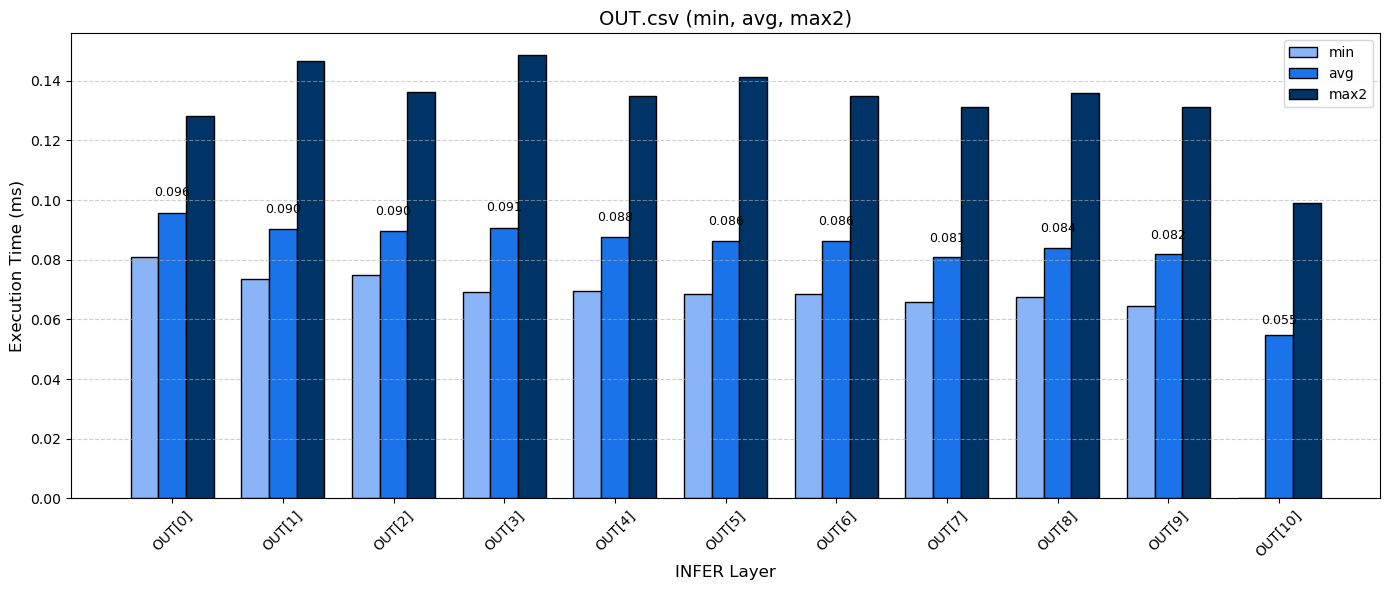

✅ Saved: /home/avees/tee/graph/component/src/OUT.png
📊 Processing: TEE.csv


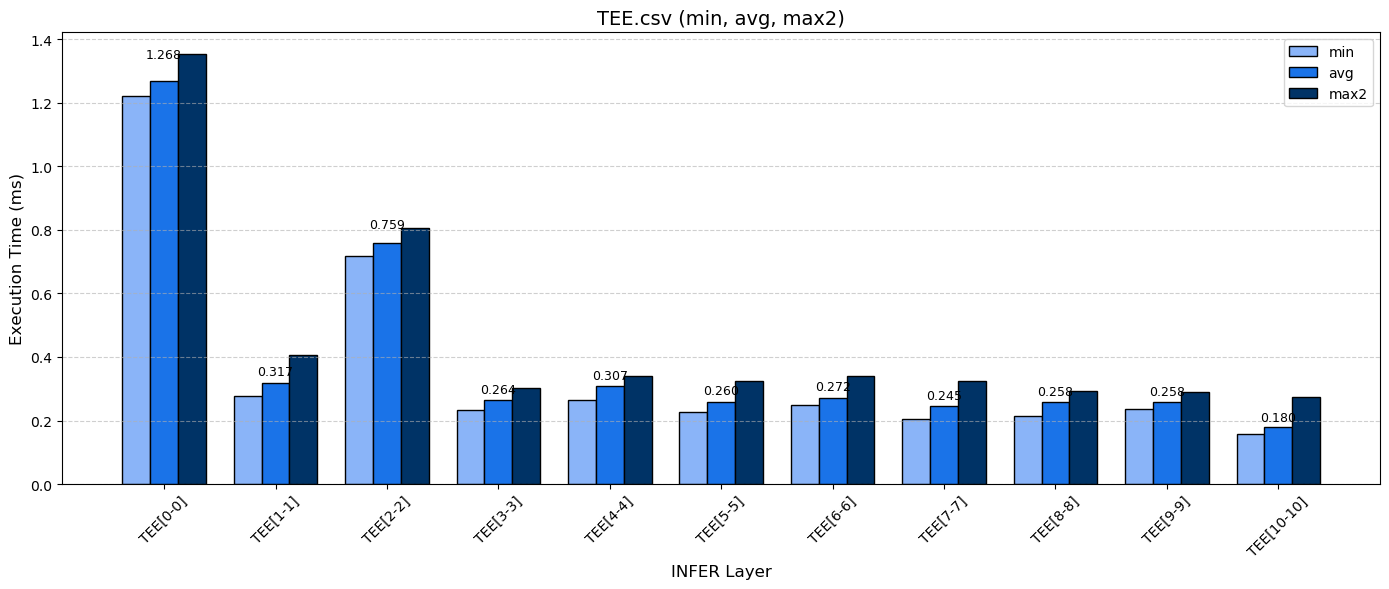

✅ Saved: /home/avees/tee/graph/component/src/TEE.png
📊 Processing: merged.csv


/home/avees/.local/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3269: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166) have mixed types. Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


TypeError: nan is not a string

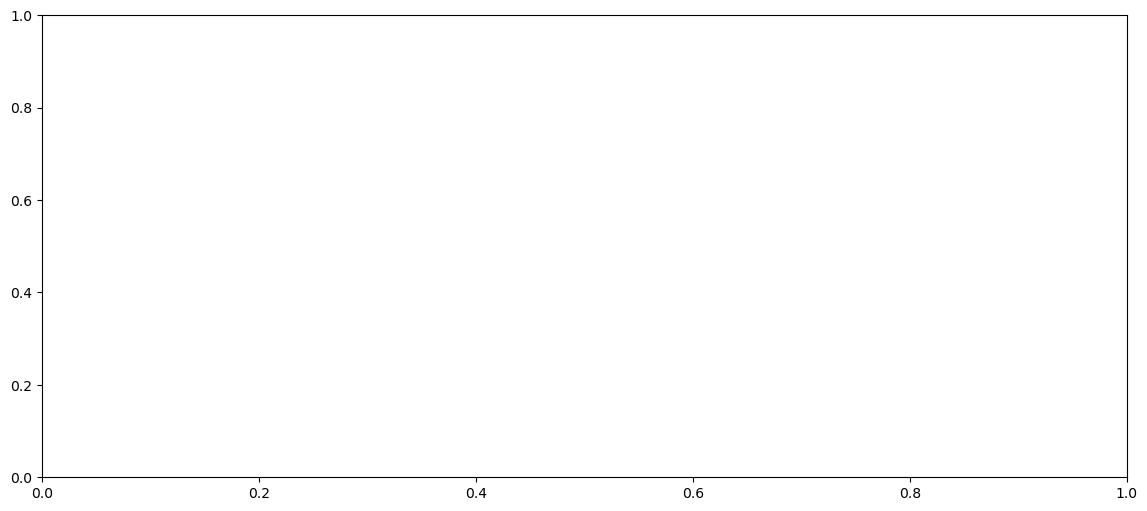

In [13]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 폴더 경로
csv_dir = "/home/avees/tee/graph/component/src"

# 동일한 hue에 채도만 다른 색상
colors = ['#8ab4f8', '#1a73e8', '#003366']  # 밝은 파랑 → 중간 → 진한 네이비

# 폴더 내 모든 CSV 파일 순회
for filename in sorted(os.listdir(csv_dir)):
    if not filename.endswith(".csv"):
        continue

    csv_path = os.path.join(csv_dir, filename)
    print(f"📊 Processing: {filename}")

    # CSV 읽기
    df = pd.read_csv(csv_path, index_col=0)

    # 사용할 행 선택 (순서: min → avg → max2)
    selected_rows = ['min', 'avg', 'max2']

    # 필요한 행이 모두 존재하지 않으면 건너뜀
    if not all(row in df.index for row in selected_rows):
        print(f"⚠️  Skipped {filename}: required rows missing ({selected_rows})")
        continue

    df_selected = df.loc[selected_rows]

    # 라벨 (x축)
    labels = df.columns.tolist()
    x = np.arange(len(labels))  # x 위치

    # 막대 폭
    width = 0.25

    plt.figure(figsize=(14, 6))

    # 막대 그래프
    plt.bar(x - width, df_selected.loc['min'], width,
            label='min', color=colors[0], edgecolor='black')
    plt.bar(x, df_selected.loc['avg'], width,
            label='avg', color=colors[1], edgecolor='black')
    plt.bar(x + width, df_selected.loc['max2'], width,
            label='max2', color=colors[2], edgecolor='black')

    # avg 막대 위에 값 표시
    for i, v in enumerate(df_selected.loc['avg']):
        plt.text(x[i], v + (v * 0.05), f"{v:.3f}", ha='center', va='bottom', fontsize=9)

    # 시각적 설정
    plt.title(f"{filename} (min, avg, max2)", fontsize=14)
    plt.ylabel("Execution Time (ms)", fontsize=12)
    plt.xlabel("INFER Layer", fontsize=12)
    plt.xticks(x, labels, rotation=45)
    plt.legend()
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()

    # PNG 파일로 저장 (같은 폴더에)
    png_path = os.path.join(csv_dir, os.path.splitext(filename)[0] + ".png")
    plt.show()
    # plt.savefig(png_path, dpi=300)
    plt.close()

    print(f"✅ Saved: {png_path}")


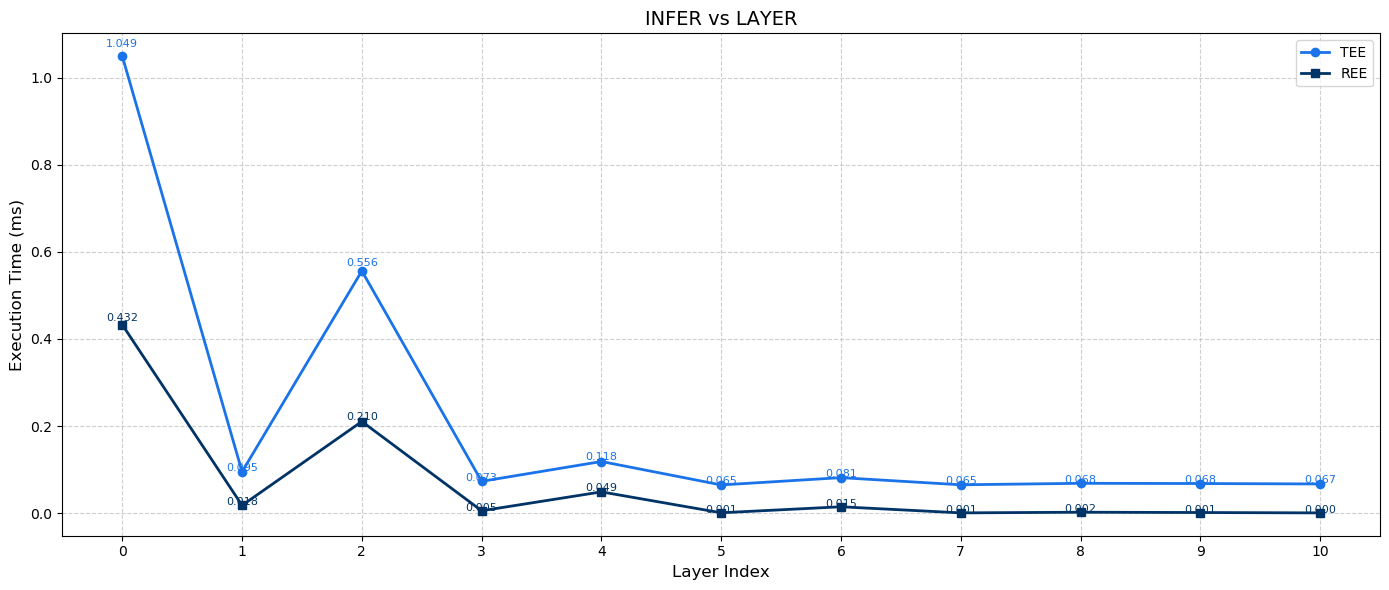

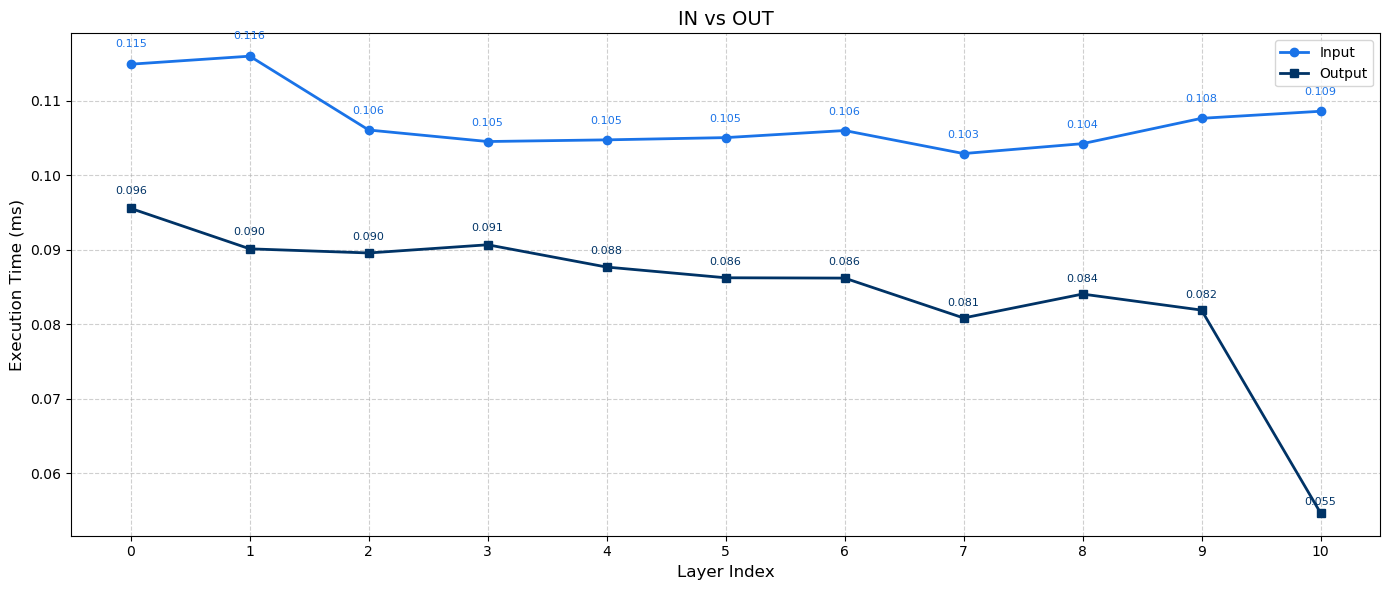

In [20]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 폴더 경로
csv_dir = "/home/avees/tee/graph/component/src"

# 색상 설정 (dark blue 계열)
colors = ['#1a73e8', '#003366']  # 두 개 그래프용 색상

# 🔹 범례(legend) 이름 직접 지정
legend_labels = {
    "INFER.csv": "TEE",
    "LAYER.csv": "REE",
    "IN.csv": "Input",
    "OUT.csv": "Output",
}

# 파일 그룹 정의
group_pairs = [
    ("INFER.csv", "LAYER.csv", "INFER vs LAYER"),
    ("IN.csv", "OUT.csv", "IN vs OUT"),
]

for file1, file2, title in group_pairs:
    path1 = os.path.join(csv_dir, file1)
    path2 = os.path.join(csv_dir, file2)

    # 두 파일 모두 존재하는지 확인
    if not (os.path.exists(path1) and os.path.exists(path2)):
        print(f"⚠️  Skipping {title}: one or both files missing")
        continue

    # CSV 읽기
    df1 = pd.read_csv(path1, index_col=0)
    df2 = pd.read_csv(path2, index_col=0)

    # avg 행만 추출
    if 'avg' not in df1.index or 'avg' not in df2.index:
        print(f"⚠️  Skipping {title}: 'avg' row missing")
        continue

    avg1 = df1.loc['avg']
    avg2 = df2.loc['avg']

    # x축: Layer index (숫자)
    x1 = np.arange(len(avg1))
    x2 = np.arange(len(avg2))

    plt.figure(figsize=(14, 6))

    # 🔹 legend 이름 지정
    label1 = legend_labels.get(file1, file1.replace('.csv', ''))
    label2 = legend_labels.get(file2, file2.replace('.csv', ''))

    # 꺾은선그래프
    plt.plot(x1, avg1.values, marker='o', linestyle='-', color=colors[0], linewidth=2, label=label1)
    plt.plot(x2, avg2.values, marker='s', linestyle='-', color=colors[1], linewidth=2, label=label2)

    # 각 점 위에 값 표시
    for i, v in enumerate(avg1.values):
        plt.text(i, v + (v * 0.02), f"{v:.3f}", ha='center', fontsize=8, color=colors[0])
    for i, v in enumerate(avg2.values):
        plt.text(i, v + (v * 0.02), f"{v:.3f}", ha='center', fontsize=8, color=colors[1])

    # 시각적 설정
    plt.title(f"{title}", fontsize=14)
    plt.xlabel("Layer Index", fontsize=12)
    plt.ylabel("Execution Time (ms)", fontsize=12)
    plt.xticks(x1)  # x축을 0,1,2,... 형태로 표시
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()


In [ ]:
import os
import pandas as pd

# CSV 폴더 경로
csv_dir = "/home/avees/tee/output/tee_time"
output_path = os.path.join(csv_dir, "merged.csv")

# 모든 CSV를 담을 리스트
all_dfs = []

# 디렉토리 내 모든 CSV 파일 순회
for filename in sorted(os.listdir(csv_dir)):
    if filename.endswith(".csv"):
        csv_path = os.path.join(csv_dir, filename)
        df = pd.read_csv(csv_path)

        # 파일명(확장자 제외) 저장용 열 추가
        df.insert(0, "source", os.path.splitext(filename)[0])

        # DataFrame 리스트에 추가
        all_dfs.append(df)

# 모든 CSV 병합 (아래로 concat)
merged_df = pd.concat(all_dfs, ignore_index=True)

# 병합된 CSV 저장
merged_df.to_csv(output_path, index=False)

print(f"✅ 모든 CSV 파일을 병합하여 저장했습니다: {output_path}")
print(f"총 행 개수: {len(merged_df)}")


/tmp/ipykernel_9004/494692898.py:24: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  merged_df = pd.concat(all_dfs, ignore_index=True)


✅ 모든 CSV 파일을 병합하여 저장했습니다: /home/avees/tee/output/tee_time/merged.csv
총 행 개수: 6700


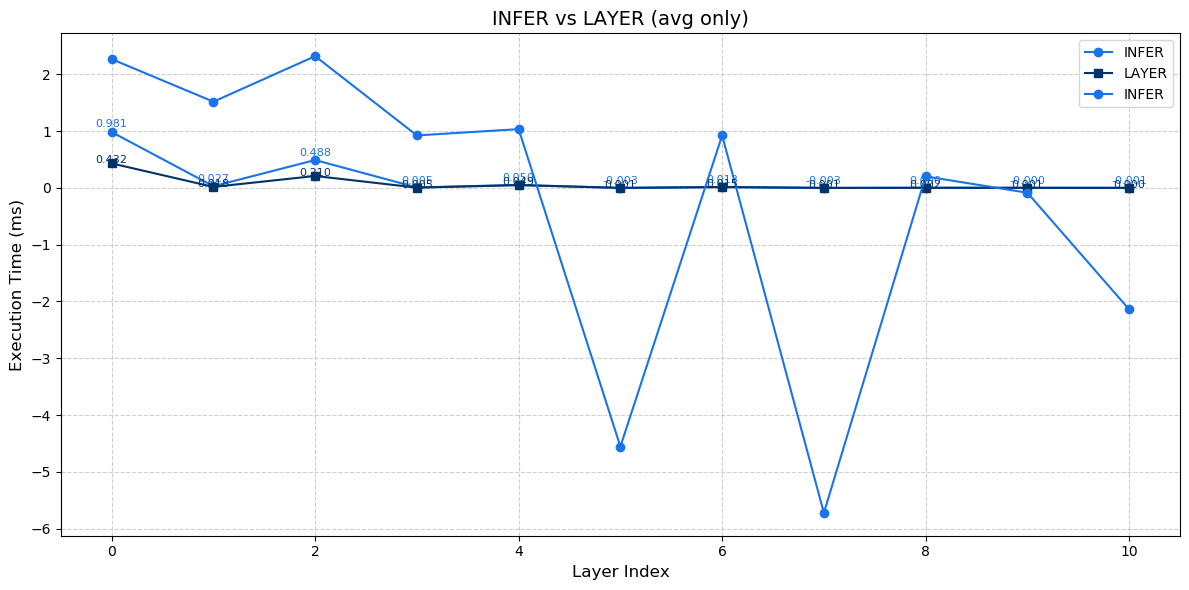

In [26]:
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# CSV 폴더 경로
csv_dir = "/home/avees/tee/graph/component/src"

# 색상 설정 (dark blue 계열)
colors = ['#1a73e8', '#003366']  # INFER/LAYER, IN/OUT 각각 구분용

# 파일 그룹 정의
group_pairs = [
    ("INFER.csv", "LAYER.csv", "INFER vs LAYER"),
]

for file1, file2, title in group_pairs:
    path1 = os.path.join(csv_dir, file1)
    path2 = os.path.join(csv_dir, file2)

    # 두 파일 모두 존재하는지 확인
    if not (os.path.exists(path1) and os.path.exists(path2)):
        print(f"⚠️  Skipping {title}: one or both files missing")
        continue

    # CSV 읽기
    df1 = pd.read_csv(path1, index_col=0)
    df2 = pd.read_csv(path2, index_col=0)

    # avg 행만 추출
    if 'avg' not in df1.index or 'avg' not in df2.index:
        print(f"⚠️  Skipping {title}: 'avg' row missing")
        continue

    avg1 = df1.loc['avg']
    avg2 = df2.loc['avg']

    # 그래프 설정
    plt.figure(figsize=(12, 6))
    x1 = np.arange(len(avg1))
    x2 = np.arange(len(avg2))

    plt.plot(x1, avg1.values-0.065, marker='o', linestyle='-', color=colors[0], label=file1.replace('.csv', ''))
    plt.plot(x2, avg2.values, marker='s', linestyle='-', color=colors[1], label=file2.replace('.csv', ''))
    plt.plot(x1, (avg1.values-0.068) / avg2.values, marker='o', linestyle='-', color=colors[0], label=file1.replace('.csv', ''))

    # 값 표시
    for i, v in enumerate(avg1.values):
        plt.text(i, v + (v * 0.02), f"{v-0.068:.3f}", ha='center', fontsize=8, color=colors[0])
    for i, v in enumerate(avg2.values):
        plt.text(i, v + (v * 0.02), f"{v:.3f}", ha='center', fontsize=8, color=colors[1])

    # 시각적 설정
    plt.title(f"{title} (avg only)", fontsize=14)
    plt.xlabel("Layer Index", fontsize=12)
    plt.ylabel("Execution Time (ms)", fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend()
    plt.tight_layout()
    plt.show()
